import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [29]:
#importing the dataset
df=pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


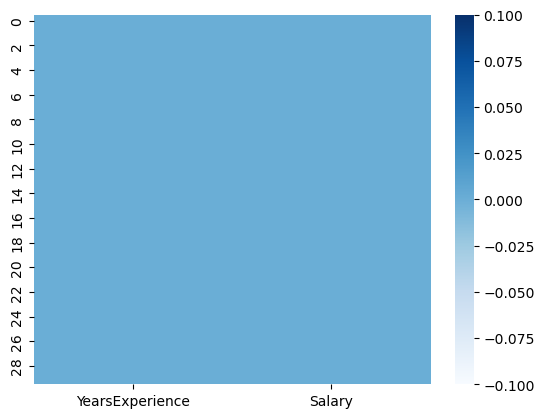

In [7]:
#missing values heatmap
sns.heatmap(df.isnull(),cmap='Blues') #the heatmap shows that there are no missing values in the data
plt.show()

In [8]:
#if there are any missing values we can fill it with the mean
df["YearsExperience"].fillna(df["YearsExperience"].mean())
df["Salary"].fillna(df["Salary"].mean())

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

C:\Users\Brayo G\AppData\Local\Temp\ipykernel_9236\1137346122.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["YearsExperience"])


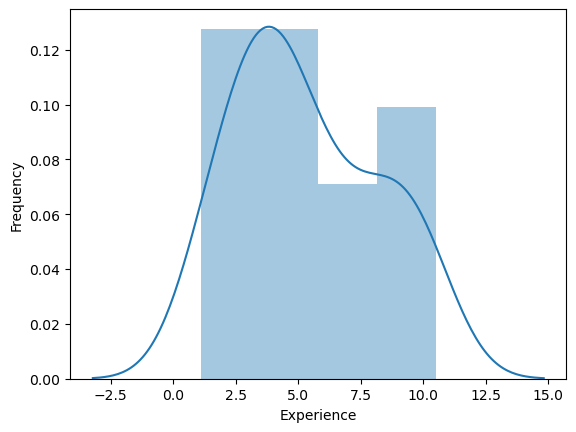

In [9]:
#detecting the normality or distribution of the data
sns.distplot(df["YearsExperience"])
plt.ylabel("Frequency")
plt.xlabel("Experience")
plt.show()
# from this we can deduce that the Experience data follows a normal distribution

C:\Users\Brayo G\AppData\Local\Temp\ipykernel_9236\1768215172.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Salary"])


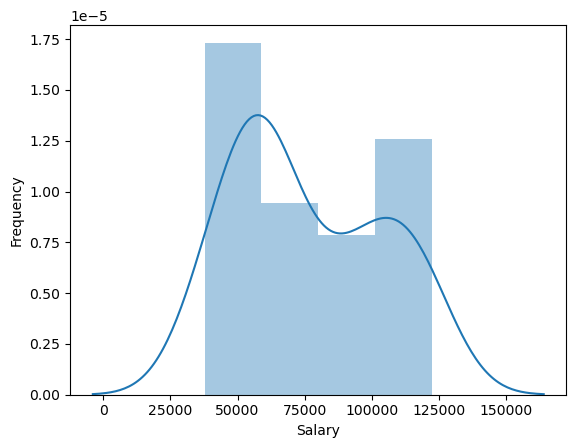

In [10]:
#for the salary
sns.distplot(df["Salary"])
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

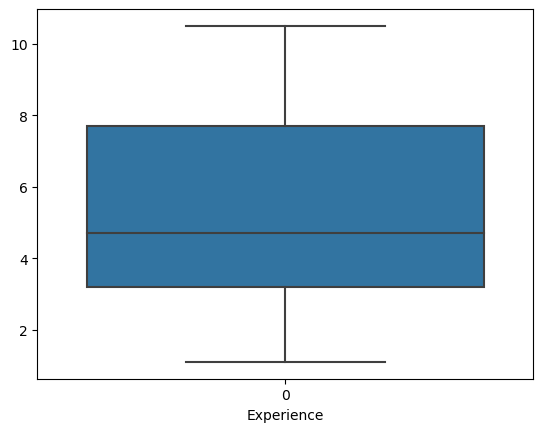

In [14]:
#deecting outliers in data
sns.boxplot(df["YearsExperience"])
plt.xlabel("Experience")
plt.show() 

#this shows that the data is slightly skewed to the left and has no outliers

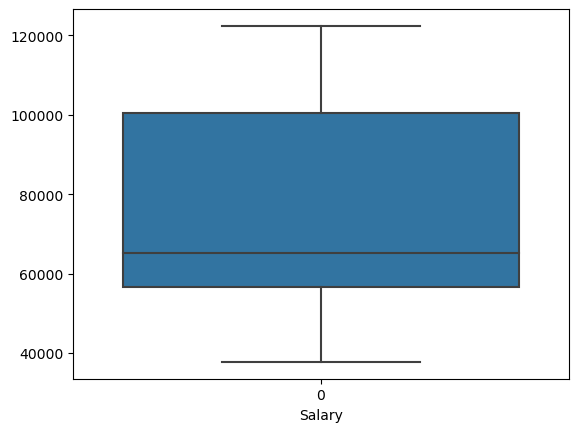

In [16]:
#for the salary
sns.boxplot(df["Salary"])
plt.xlabel("Salary")
plt.show()
#the boxplot shows that the data is slightly skewed to the left and has no outliers

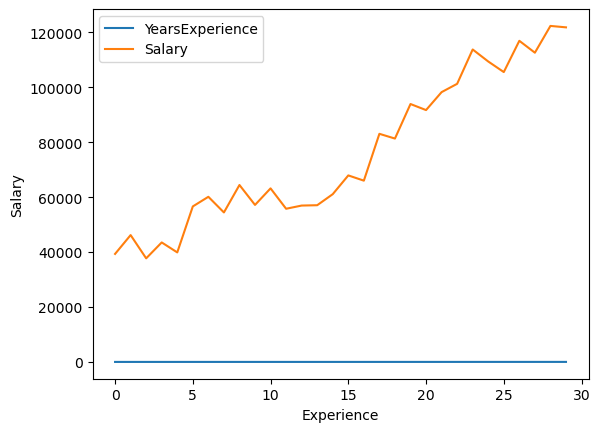

In [18]:
# ploting th independent variable against the dependent
df.plot(kind="line")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()
#the visualization shows that salary increases as the years of expirirnce increase

In [23]:
#plotting tht probability density function
#It captures th prob of a continuous random variable
sns.kdeplot(df["YearsExperience"],df["Salary"])
plt.title("Experience and salary density plot ")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

TypeError: kdeplot() takes from 0 to 1 positional arguments but 2 were given

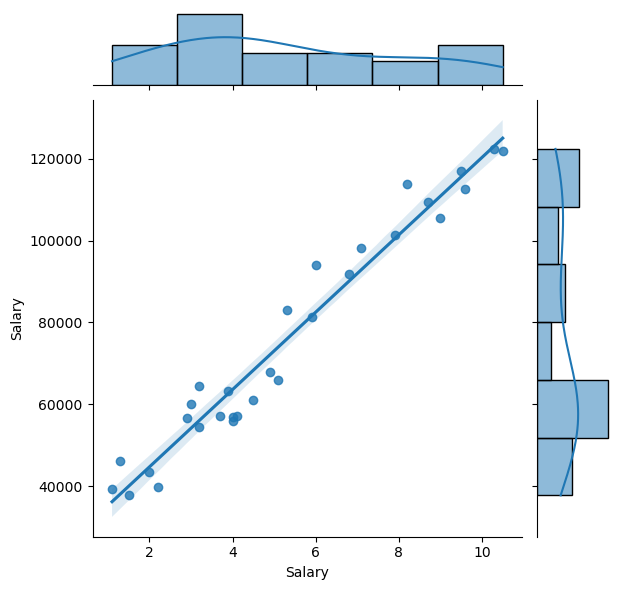

In [26]:
#plotting a joint plot
sns.jointplot(x="YearsExperience",y="Salary",data=df,kind="reg")
plt.ylabel("Salary")
plt.xlabel("Salary")
plt.show()
#The plot indicates a straight line that fits perfectly the data
#Therefore there is a strong correlation realtionship between the employees Tears of Experience and the slaries

In [31]:

'''The talbe highlights that the arithmetic average of employees' work is 5 years and that the employees asalary is
 Ksh.76,003 per year. 
 The values of employees work experinence deviate away from the mean value by 3 and the value of the employees salary by
 Ksh.27,414
 Lowest work experince is 1.1yrs and the lowest salary is Ksh.37,331
 One out of 4 employees earns a salary of about Ksh.56,721
 Employees who earn a salary of Ksh.100,544 and above annualy fall under the upper echelon
 '''
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


<Axes: >

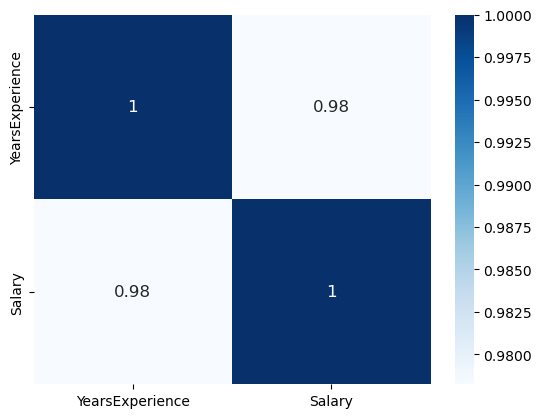

In [33]:
#Understanding the correlation between the variables
dfcorr=df.corr(method="pearson")
sns.heatmap(dfcorr,annot=True,annot_kws={'size':12},cmap="Blues")
#The correlation of 0.98 shows a strong correlation the employees Expirience and Salaries

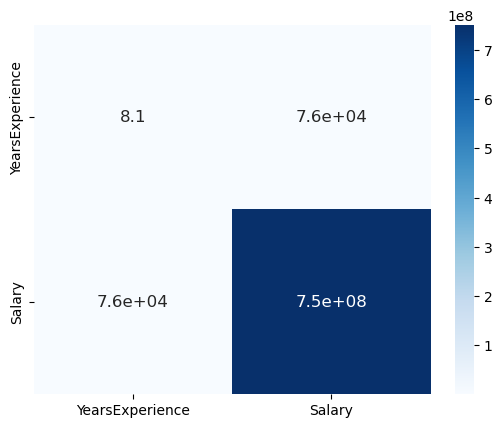

In [36]:
#The Covariannce-this is the joint variability between two variable(It estimates how two variables vary together)
dfcov=df.cov()
sns.heatmap(dfcov,annot=True,annot_kws={"size":12},cmap="Blues")
plt.show()
#The covariance is approximately 0.0076(which is close to 1)
#Hence apositive realtionship between the variable 

## Modeling

In [38]:
#Assigning and reshaping arrays
x=np.array(df["YearsExperience"])
y=np.array(df["Salary"])

In [39]:
#reshaping the data into two dimensional arrays data
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [48]:
#splitting the data into training_testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [50]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler  
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

#### Creating a least squares model using statsmodels

In [53]:
import statsmodels.api as sm

In [56]:
x_constant=sm.add_constant(x_train)
x_test=sm.add_constant(x_test)

#model
model=sm.OLS(y_train,x_constant).fit()

In [57]:
#predictions
y_pred=model.predict(x_test)
pd.DataFrame(y_pred,columns=["Predicted salary"])

,Predicted salary
0,40748.961841
1,122699.622956
2,64961.657170
3,63099.142145
4,115249.562855
5,107799.502753


In [59]:
summary=model.summary()
summary
#R-squared =rep the variation the model explains about the data
#Adjusted R-squared =represents the variation of the independent variable that influencest the dependent variable

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     352.1
Date:                Wed, 25 Oct 2023   Prob (F-statistic):           5.03e-15
Time:                        10:54:38   Log-Likelihood:                -242.89
No. Observations:                  24   AIC:                             489.8
Df Residuals:                      22   BIC:                             492.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.389e+04   1281.861     57.640      0.000    7.12e+04    7.65e+04
x1          2.405e+04   1281.861     18.765      0.000    2.14e+04    2.67e+04
==============================================================================
Omnibus:                        3.105   Durbin-Watson:                   2.608
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                1.567
Skew:                           0.297   Prob(JB):                        0.457
Kurtosis:                       1.898   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Developing a model using scikit learn

In [60]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [62]:
#Determining the mean and SD of the CrossValidation scores
lm.get_params()
#fit_intercept=Determines whether the model must estiamte an intercept
#normalize= Determines whether we must normalize the independent variables
#copy_x=Determines whether we must copy the independent variables

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [70]:
#developing GrindCV model using GrindSearchCV
from sklearn.model_selection import GridSearchCV
param_grid={'fit_intercept':[True,False],
           
           'copy_X':[True,False]}

grid_model=GridSearchCV(estimator=lm,param_grid=param_grid,n_jobs=-1)
grid_model.fit(x_train,y_train)

GridSearchCV(estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]})

In [69]:
lm=LinearRegression(copy_X=True,fit_intercept=True)
lm.fit(x_train,y_train)

LinearRegression()

In [71]:
#finding th intercept
lm.intercept_

array([73886.20833333])

In [72]:
#THE estimated coefficient 
lm.coef_
#The formular of the staright line is
 # y=73886.20833333+ 24053.85556857x1 + e1
    # for every additional year of work experirience the salary increases by 24,054

array([[24053.85556857]])

In [87]:
x_test = x_test[:, 1].reshape((6,1))

In [88]:
#Testing the model performance
y_pred=lm.predict(x_test)
pd.DataFrame(y_pred,columns=["Predicted salary"])

,Predicted salary
0,40748.961841
1,122699.622956
2,64961.657170
3,63099.142145
4,115249.562855
5,107799.502753


In [89]:
pd.DataFrame(y_test,columns=["Actual Salary"])

,Actual Salary
0,37731.0
1,122391.0
2,57081.0
3,63218.0
4,116969.0
5,109431.0


In [91]:
#Evaluation metrics
import sklearn.metrics as met
MAE= met.mean_absolute_error(y_test,y_pred)
MSE=met.mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
R2=met.r2_score(y_test,y_pred)
EV=met.explained_variance_score(y_test,y_pred)
MGD=met.mean_gamma_deviance(y_test,y_pred)
MPD=met.mean_poisson_deviance(y_test,y_pred)
lmmodelevaluation=[[MAE,MSE,RMSE,R2,EV,MGD,MPD]]
lmmodelevaluationdata=pd.DataFrame(lmmodelevaluation,
                                  index=["Values"],
                                  columns=["MAE","MSE","RMSE","R2",
                                          "Evaluation variance score",
                                          "Mean gamma deviance",
                                           "Mean Poisson deviance"]).transpose()
lmmodelevaluationdata

,Values
MAE,2.446172e+03
MSE,1.282341e+07
RMSE,3.580979e+03
R2,9.881695e-01
Evaluation variance score,9.897038e-01
Mean gamma deviance,3.709334e-03
Mean Poisson deviance,2.129260e+02


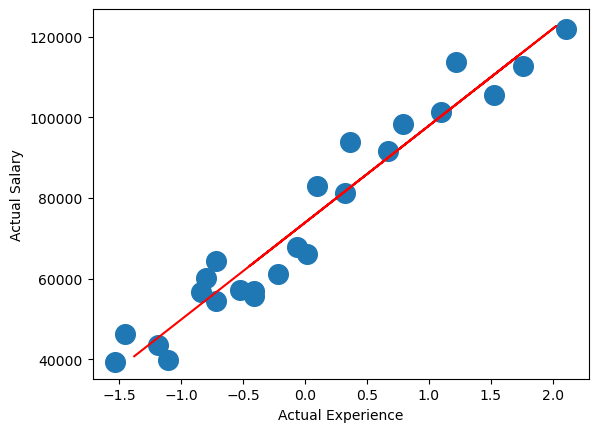

In [92]:
#Training Data
plt.scatter(x_train,y_train,s=200)
plt.plot(x_test,y_pred,color="red")
plt.xlabel("Actual Experience")
plt.ylabel("Actual Salary")
plt.show()
#The data points are close to a straight line ,but the closeness is not exterme 
#Hence there is a linear relationship btwn salary and number of years worked

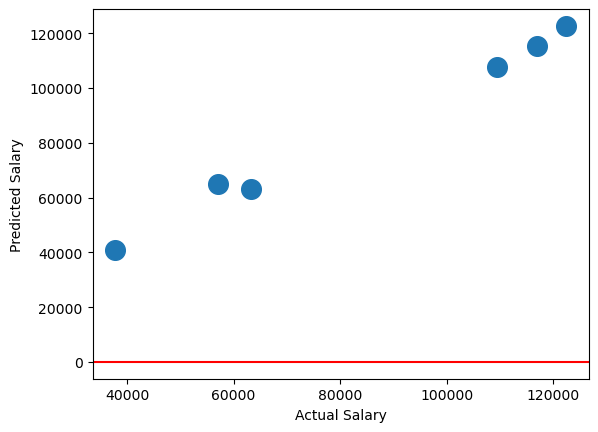

In [96]:
# Actual Values and Predicted Values
plt.scatter(y_test,y_pred,s=200)
plt.axhline(color="red")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()